In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Asus\Documents\Data Science\Assignements\ToyotaCorolla - MLR.csv")
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [2]:
#1.EDA
df.columns


Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [3]:
df.shape

(1436, 11)

In [4]:
df.info()#no null values in data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.nunique()

Price         236
Age_08_04      77
KM           1263
Fuel_Type       3
HP             12
Automatic       2
cc             13
Doors           4
Cylinders       1
Gears           4
Weight         59
dtype: int64

In [6]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [8]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [9]:
#the cylinder column as same values throught the column so it has std=0
#we have no use with cylinder column as  it carries no informational value for modeling or correlation.

In [10]:
#so we will drop it
df = df.drop(columns=['Cylinders'])
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,5,1170


In [11]:
z=df.corr(numeric_only=True)
z

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,-0.160141,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,0.020613,1.000000


<Axes: title={'center': 'Heat Map of Toyota corolla  '}>

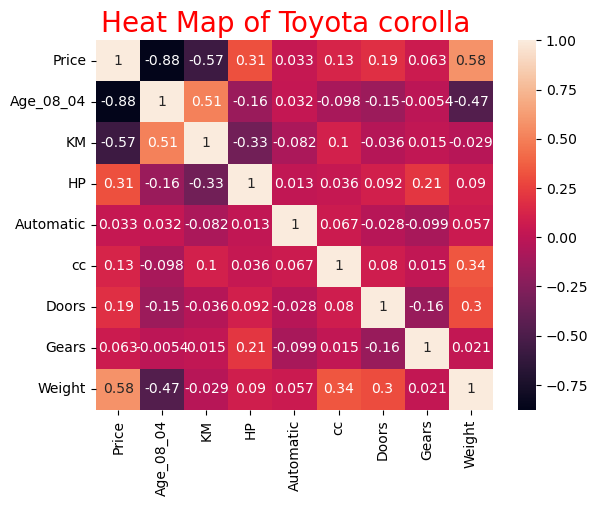

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('Heat Map of Toyota corolla  ',fontsize=20,color='Red')
sns.heatmap(z,annot=True)

In [13]:
#labelencoding
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Fuel_Type']=LE.fit_transform(df['Fuel_Type'])
df['Fuel_Type']
#print(LE.classes_)
#converted categorical to numerical of Fuel_type column

0       1
1       1
2       1
3       1
4       1
       ..
1431    2
1432    2
1433    2
1434    2
1435    2
Name: Fuel_Type, Length: 1436, dtype: int32

In [14]:
x=df.loc[:,['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Gears', 'Weight']]
x

,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,23,46986,1,90,0,2000,3,5,1165
1,23,72937,1,90,0,2000,3,5,1165
2,24,41711,1,90,0,2000,3,5,1165
3,26,48000,1,90,0,2000,3,5,1165
4,30,38500,1,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...
1431,69,20544,2,86,0,1300,3,5,1025
1432,72,19000,2,86,0,1300,3,5,1015
1433,71,17016,2,86,0,1300,3,5,1015
1434,70,16916,2,86,0,1300,3,5,1015


In [15]:
y=df['Price']
y


0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [16]:
#2.training the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=42)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1148, 9), (288, 9), (1148,), (288,))

In [18]:
#3.Model Building
# Model1
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_test,y_test)

LinearRegression()

In [19]:
y_pred=model.predict(x_test)
y_pred

array([11768.33910244,  8717.61152558,  9019.05672347,  8664.06559494,
        9793.14508634,  7371.25659452,  8711.27485011,  8124.61892432,
       13881.28217845, 12863.96040723,  8924.91377355,  9138.05221943,
       12723.63078108, 13590.72327062,  9548.87646433,  8636.30890613,
       12808.03459759, 17385.39800341,  7115.81472171,  8898.01200717,
       12784.70668601, 17367.62671521,  7647.31961764, 10952.83827346,
        7662.32108196, 15403.03964787, 10138.04872466,  7069.34645883,
       15381.03303267, 14334.16344147,  7950.34056522,  9926.66121515,
        8219.75974004,  9970.80845344, 10147.2820304 ,  7786.66591968,
        8889.94156156,  9833.00361212, 16098.49213288,  9178.07269552,
        9734.67591436,  9385.89949129,  7559.67731092,  5721.29105112,
        7128.81014479, 16362.44457952,  9289.5434695 , 10385.80418015,
        9124.73184177, 13237.66121422, 12917.57106224,  6664.21852965,
       14590.58527883, 15500.6290701 ,  6295.4839334 ,  7411.73610524,
      

In [20]:
coefficients=pd.Series(model.coef_,index=x.columns)
print(coefficients)

Age_08_04    -123.456128
KM             -0.019496
Fuel_Type   -5777.811242
HP            101.251967
Automatic     515.319563
cc             -6.785032
Doors          29.889650
Gears           8.675072
Weight         11.383728
dtype: float64


In [21]:
# Model2
from sklearn.linear_model import LinearRegression
model2=LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [22]:
yprd1=model2.predict(x_train)
yprd1

array([ 9039.16105097,  8782.07282552, 13592.06600738, ...,
        7939.16190091,  8546.25692398,  6504.61313148])

In [23]:
coeff2=pd.Series(model2.coef_,index=x.columns)
coeff2

Age_08_04   -121.436240
KM            -0.016936
Fuel_Type    862.056431
HP            20.658283
Automatic    245.196891
cc            -0.073515
Doors        -36.279648
Gears        530.282040
Weight        23.510643
dtype: float64

In [24]:
#Model3:Correlation with target
#You now have top 3 features that are strongly related to the target.
from sklearn.linear_model import LinearRegression
correlations=df.corr()['Price'].drop('Price').abs().sort_values(ascending=False)
top3_features=correlations.head(3).index.tolist()
print("Top 3 Features:", top3_features)

model3=LinearRegression()
model3.fit(x_train[top3_features],y_train)

Top 3 Features: ['Age_08_04', 'Weight', 'KM']


LinearRegression()

In [25]:
#df.corr()['Price']-->finding corelation with price
#.drop('Price')-->should drop the self column since it has high value 1 expect the self col we need to find corr with others
#.abs()--->gets the absolute value to find strongest relationship
#.sort_values(ascending=False)-->sorts features by strength of correlation.
#top3_features=correlations.head(3).index.tolist()
#.head(3)→picks the top 3 features
#.index.tolist()→gets the column names as a Python list

In [26]:
y_pred3=model3.predict(x_test[top3_features])
y_pred3

array([11592.36344902,  8662.50688829, 10155.64437279,  8727.28276179,
        9956.78392895,  7530.28119008,  8484.73894122,  8185.75367113,
       13905.28910339, 13069.24612993,  9068.35711847,  9193.38775918,
       12822.76542703, 13324.62186337,  9446.6747292 ,  8693.31232308,
       12470.89065656, 17730.35061591,  6798.19472384,  9022.68155854,
       12604.10363537, 17781.48702151,  7690.29004596, 10714.33569117,
        7665.15690533, 15926.03543039,  9949.51144577,  6777.44194145,
       15777.52866174, 14477.13194076,  7851.93146497,  9722.7407428 ,
        8317.95442812,  9872.22730581, 10095.05646483,  7752.4745434 ,
        8603.12600234,  9736.14590987, 16455.91809994,  9066.38115658,
        9725.75466812,  9361.20590254,  7636.16993758,  5391.80211868,
        7169.04436276, 16890.26360978,  9201.61771951, 10439.66961374,
        9234.18955375, 13503.18797927, 12979.73750931,  6772.02329538,
       14855.29158447, 16194.03101232,  6078.90073683,  7411.44631987,
      

In [27]:
coefficients3=pd.Series(model3.coef_, index=top3_features)
print(coefficients3)

Age_08_04   -117.963603
Weight        20.647584
KM            -0.024617
dtype: float64


In [28]:
#4.evaluation
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score
#r2 score=ssr/sst,regression sum of square/total sum of square
#r2_score evaluates predicted v/s trained model 
#

0.8750007618807176

In [29]:
# the model as got 87% r2_score.it is a very good model

In [30]:
#5.Lasso and Ridge 
from sklearn.linear_model import Lasso,Ridge
lasso=Lasso(alpha=15)
lasso.fit(x_test,y_test)

Lasso(alpha=15)

In [31]:
y_predL=lasso.predict(x_test)
y_predL

array([11672.0016275 ,  8817.18441064,  8994.96289247,  8720.52112855,
        9862.92222189,  7442.2653681 ,  8757.41308183,  8186.59314795,
       14018.17968387, 12977.87689669,  9030.50411978,  9226.95891734,
       12836.51163712, 13528.23138768,  9664.73056318,  8538.39626036,
       12739.70930978, 17170.20596968,  7219.39691916,  8948.53253913,
       12906.11565118, 17596.31306065,  7720.65962479, 10855.83521877,
        7549.23749945, 15602.15912698,  9692.32456098,  7168.76899439,
       15421.1106491 , 14459.57177284,  8032.75162258,  9934.93178008,
        8266.1328246 , 10076.70138584, 10248.69799322,  7872.48639624,
        8932.2900394 ,  9937.0540062 , 16152.39959253,  9279.46919709,
        9825.2052354 ,  9474.59990745,  7601.4419963 ,  5643.94449928,
        7015.75615005, 16615.07406629,  9386.02686606, 10477.91573659,
        9025.10539947, 13347.435782  , 13049.39637682,  6536.25819837,
       14640.03877893, 15760.13121762,  6208.90916345,  7462.59243888,
      

In [32]:
scoreL=r2_score(y_test,y_predL)
scoreL

0.8721720662143164

In [33]:
ridge=Ridge(alpha=15)
ridge.fit(x_train,y_train)

Ridge(alpha=15)

In [34]:
y_predR=ridge.predict(x_test)
y_predR

array([11202.97779098,  8975.58481172,  9406.76234469,  8962.51520581,
       10100.75477347,  7902.05547156,  8725.71638225,  8294.51320997,
       14101.55698323, 13137.08222128,  9484.94619154,  9351.2100976 ,
       12958.41832668, 12994.43588348,  9794.46211423,  8265.87338991,
       12239.65399488, 17532.79549532,  7425.90389005,  9171.52491696,
       12732.38149485, 17806.62116563,  7910.49386481, 10430.84919851,
        7483.76539582, 16018.10543025,  9928.2960771 ,  7373.50044259,
       15636.0929846 , 14506.16494906,  8171.47636467,  9750.14826892,
        8522.01535503, 10129.01582776, 10286.67881987,  8067.65195478,
        8842.93483113,  9995.01150557, 16342.40687779,  9583.90879741,
        9874.49978496,  9541.12335341,  7888.73888068,  5552.68861816,
        6810.17812782, 17165.78226981,  9465.92637222, 10706.45958809,
        8724.01120154, 13481.83800221, 13010.96030188,  6340.66649975,
       14908.12363588, 16283.6927257 ,  6076.56572155,  7767.45525818,
      

In [35]:
scoreR=r2_score(y_test,y_predR)
scoreR

0.8443050523557818

In [ ]:
#1.What is Normalization & Standardization and how is it helpful?

#Answer: Normalization is the process of rescaling the values of a 
#feature to a specific range, typically between 0 and 1.
#It ensures that all features have the same scale,
#especially useful when the data does not follow a normal distribution.


#Standardization transforms the data to have a mean of 0 and a standard deviation of 1.
#This technique is useful when the data is assumed to follow a normal distribution.


#Helpful:
#Many machine learning algorithms perform better when input features are on the same scale.
#They help speed up training and improve accuracy by preventing larger values from dominating smaller ones.
#They ensure each feature contributes equally to the model’s predictions.
#Essential for methods that use distance, gradients, or assumptions of normality

In [ ]:
#2.What techniques can be used to address multicollinearity in multiple linear regression?

#Answer: Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, 
#meaning they contain overlapping information. This can lead to unstable coefficients, inflated standard errors, 
#and difficulty in interpreting the model.

#Techniques to Handle Multicollinearity:
#Remove Highly Correlated Predictors
#Principal Component Analysis (PCA)
#Partial Least Squares (PLS) Regression
#Regularization Techniques
#Combine or Transform Variables